# Normal Мoveout and Velocity Analysis

![](http://wiki.seg.org/images/7/72/Seismic-data-analysis.jpg)

[Images from Oz Yilmaz "Seismic Data Analysis"](http://wiki.seg.org/wiki/Velocity_analysis)

![](http://wiki.seg.org/images/d/d3/Ch01_fig5-9.png)

![](http://wiki.seg.org/images/7/70/Ch01_fig5-11.png)

![](http://wiki.seg.org/images/0/0a/Ch01_fig5-12.png)

The Common Midpoint (CMP) method (also known as CDP for *Common Depth Point*) was invented in 1950 by W. Harry Mayne, a geophysicist at Petty Geophysical and a UT Austin alumnus.

> "The question was how to attenuate long wavelength noise without obscuring the very geological detail we were after. I tried to find a different way of adding traces, that is, with signals representing the same geology, but with greater effective length. Finally the answer I came up with was to add only those traces which were successively recorded from sources symmetrically located on the opposite side of the same mid-point. And there it was - common reflection point stacking." D. Proubasta, 1985, 
> [Harry Mayne](http://library.seg.org/doi/abs/10.1190/1.1439157): The Leading Edge, 4(7), 18-24.

Thus, the original motivation for the method was noise attenuation by stacking of seismic traces. Although this continues to be one of the most important reasons for using the CMP method, the method has acquired another important reason: velocity analysis.

To understand the connection between velocities measured in the CMP velocity analysis and true seismic velocities in the subsurface, let us consider first the case when the velocity varies only vertically with depth: the so-called $V(z)$ model.

![](http://wiki.seg.org/images/8/81/Ch03_fig1-8.png)

In [1]:
%%file vofz.scons

Flow('vel',None,'spike n1=501 nsp=4 mag=0.5 k1=101,201,301,401 | causint | add add=2')

Result('vel',
       '''
       graph min2=0 max2=5 label2=Velocity unit2=km/s plotfat=3
       transp=y yreverse=y wanttitle=n wherexlabel=t
       ''')

Overwriting vofz.scons


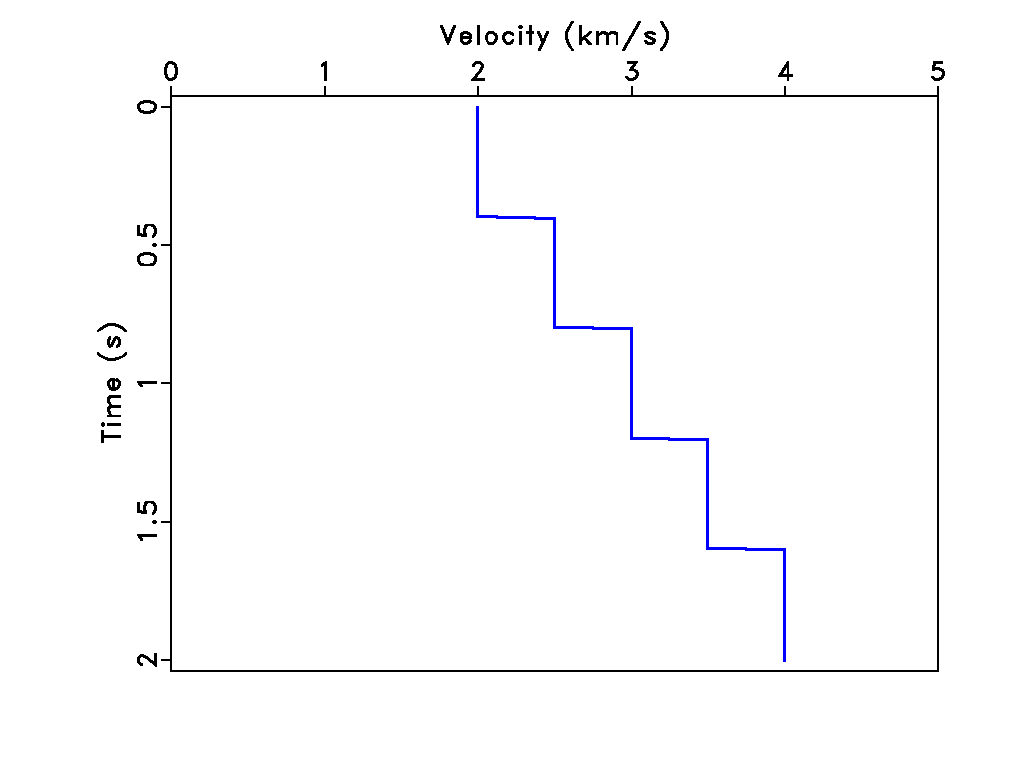

In [2]:
from m8r import view
view('vel')

In [3]:
%%file cmp.scons

# Define reflectivity as a function of ray parameter
Flow('refl','vel',
     '''
     ai2refl | ricker1 frequency=10 | 
     spray axis=2 n=251 d=0.01 o=0
     ''')

# Model CMP gather
Flow('cmp','refl vel',
     '''
     itxmo velocity=${SOURCES[1]} nx=150 dx=0.02 x0=0.02 inv=y | 
     window f2=2 max2=3 | put label2=Offset unit2=km | 
     mutter v0=1.8 half=n |
     noise seed=2016 var=1e-6
     ''')
Result('cmp','grey title="CMP Gather" ')

Overwriting cmp.scons


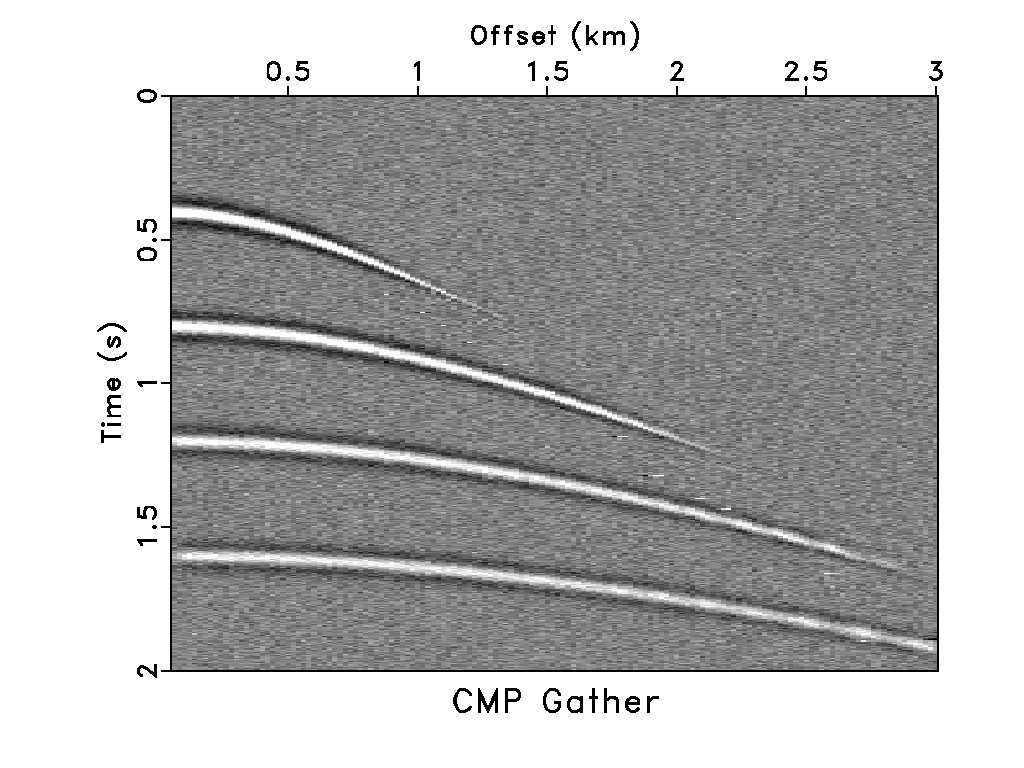

In [4]:
view('cmp')

In [6]:
%%file velan.scons

# Velocity scan
Flow('vscan','cmp','vscan semblance=y half=n v0=1.5 nv=101 dv=0.02')
Plot('vscan','grey allpos=y color=j title="Semblance Scan" ')

# Automatic picking
Flow('vpick','vscan','scale axis=2 | pick rect1=40 vel0=2')
Plot('vpick',
     '''
     graph pad=n transp=y yreverse=y dash=1 plotcol=0 plotfat=3 wantaxis=n wanttitle=n min2=1.5 max2=3.5
     ''')

# Overlay pick on velocity scan
Result('vscan','vscan vpick','Overlay')

Overwriting velan.scons


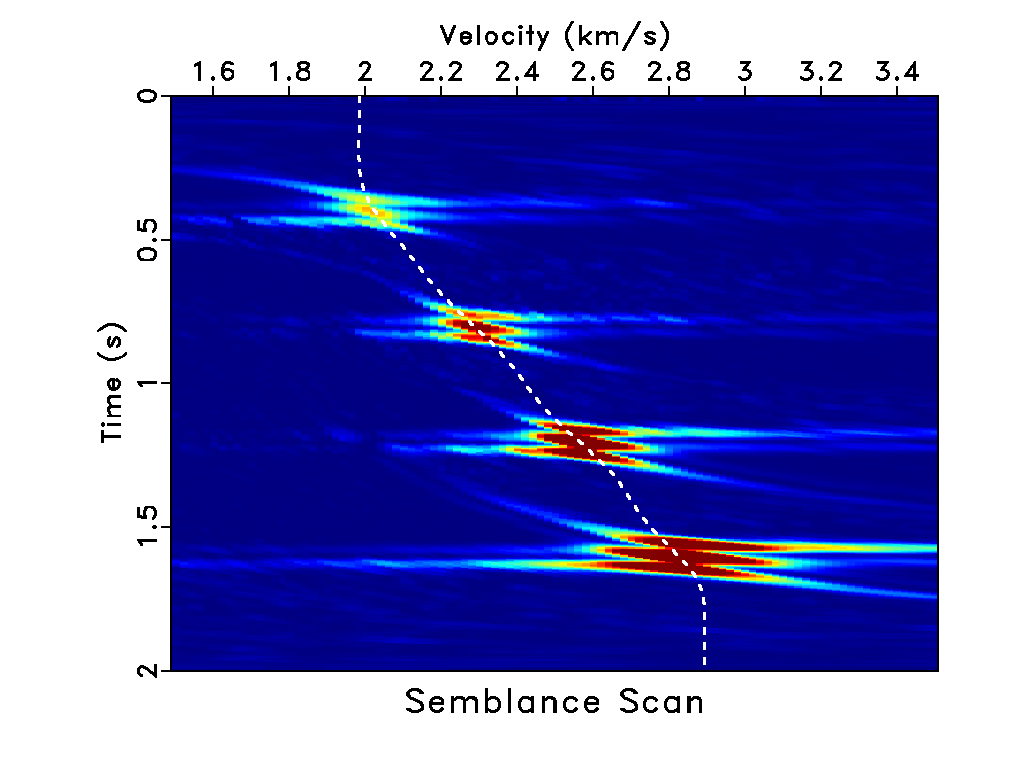

In [7]:
view('vscan')

In [8]:
%%file nmo.scons

# Apply NMO
Flow('nmo','cmp vpick','nmo half=n velocity=${SOURCES[1]}')
Result('nmo','grey title="Normal Moveout" ')

Overwriting nmo.scons


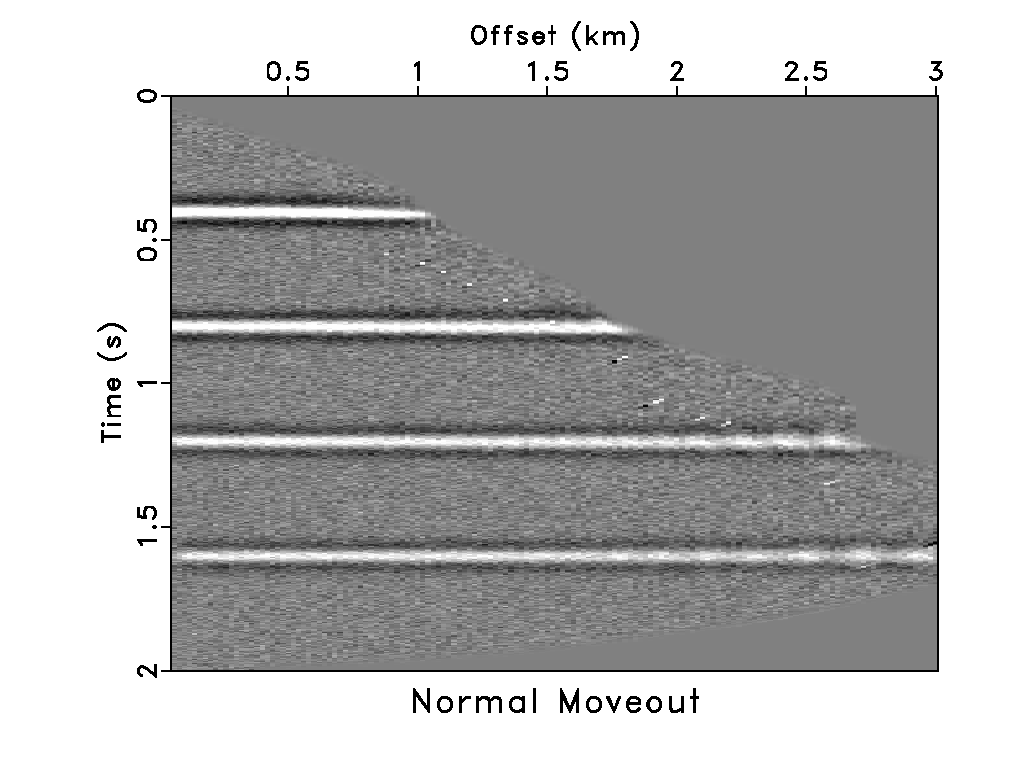

In [9]:
view('nmo')

**Dix inversion**

To relate measured and true velocities, consider reflection ray tracing in a layered velocity medium. Inside one layer with depth $\Delta z$ and velocity $v$, the time increment is

$$\Delta t = \displaystyle 2 \frac{\Delta z}{v\,\cos{\theta}}\;,$$

where $\theta$ is the ray angle.

The offset increment is

$$\Delta x = 2 \Delta z \tan{\theta}\;.$$

Between two layers with different velocities, the angle changes but satisfies the Snell's law

$$\displaystyle p = \frac{\sin{\theta_1}}{v_1} = \frac{\sin{\theta_2}}{v_2}$$

Expressing the angle using 

$$\sin{\theta_n} = p\,v_n\;,$$

we can write parametric expressions for the reflection traveltime

$$\left\{\begin{array}{rcl} t(p) & = & \displaystyle 2\,\sum_n \frac{\Delta z_n}{v_n\,\sqrt{1-p^2\,v_n^2}}\;, \\
x(p) & = & \displaystyle 2\,\sum_n \frac{p\,v_n\,\Delta z_n}{\sqrt{1-p^2\,v_n^2}}\;.\end{array}\right.$$

Recal the power series expansion

$$(1+x)^q = \displaystyle 1 + q\,x + \frac{q\,(q-1)}{2}\,x^2 + \cdots$$

The expansion of the inverse square root in the equations above in powers of $p$ is

$$\displaystyle \frac{1}{\sqrt{1-p^2\,v_n^2}} = \left(1-p^2\,v_n^2\right)^{-1/2} = 1 + \frac{1}{2}\,p^2\,v_n^2 + \frac{3}{8}\,p^4\,v_n^4 + \cdots$$

Substituting in the parametric expressions, we can expand them in powers of $p$:

$$\begin{array}{rcl} t(p) & = & \displaystyle M_{-1} + \frac{1}{2}\,M_1\,p^2 + \frac{3}{8}\,M_3\,p^4 + \cdots \\
x(p) & = & \displaystyle M_1\,p + \frac{1}{2}\,M_3\,p^3 + \frac{3}{8}\,M_5\,p^5 + \cdots\end{array}$$

where $M_k = \displaystyle 2\,\sum_n v_n^k \Delta z_n$.

We can invert the second series to express the ray parameter $p$ as a power series in powers of offset $x$:

$$p = a_1\,x + a_3\,x^3 + \cdots$$

Making a substitution and collecting powers of $x$:

$$x = \displaystyle M_1\,\left(a_1\,x + a_3\,x^3 + \cdots\right) + \frac{M_3}{2}\,\left(a_1\,x + a_3\,x^3 + \cdots\right)^3 + \cdots =  M_1\,a_1\,x + \left(M_1\,a_3 + \frac{M_3}{2}\,a_1^3\right)\,x^3 + \cdots$$

which leads to

$$\begin{array}{rcl} a_1 & = & \displaystyle \frac{1}{M_1} \\ a_3 & = & \displaystyle - \frac{M_3\,a_1^3}{2\,M_1} = - \frac{M_3}{2\,M_1^4} \\ \cdots \end{array}$$

Therefore,

$$p = \displaystyle \frac{x}{M_1} - \frac{M_3\,x^3}{2\,M_1^4} + \cdots$$

Now we can insert this into the traveltime expansion to expand the reflection traveltime (moveout) as a power seris in offset:

$$t = \displaystyle \displaystyle M_{-1} + \frac{M_1}{2}\,\left(\frac{x}{M_1} - \frac{M_3\,x^3}{2\,M_1^4}\right)^2 + \cdots
= M_{-1} + \frac{x^2}{2\,M_1} + \cdots$$

Finally, expressing the squared traveltime:

$$t^2 \approx M_{-1}^2 + \frac{M_{-1}}{M_1}\,x^2 = t_0^2 + \frac{x^2}{v_0^2}\;,$$

where 

$$t_0 = M_{-1} = \displaystyle 2\,\sum_n \frac{\Delta z_n}{v_n}$$ 

corresponds to the zero-offset vertical traveltime, and 

$$v_0 = \displaystyle \sqrt{\frac{M_1}{M_{-1}}} = \sqrt{\frac{2}{t_0}\,\sum_n v_n\,\Delta z_n}$$ 

is the so-called RMS (*root mean square*) velocity. 

If we denote $2\,\Delta z_n/v_n$ by $\Delta t_n$, then

$$v_0^2 = \displaystyle \frac{1}{t_0}\,\sum_n v_n^2\,\Delta t_n\;.$$ 


The process of converting from $v_0$ to inveral velocities $v_n$ is known as the *Dix inversion* after C. Hewitt Dix

![](http://wiki.seg.org/images/8/89/C._Hewitt_Dix_headshot.png)

C. H. Dix, 1955, [Seismic velocities from surface measurements](http://library.seg.org/doi/abs/10.1190/1.1438126): Geophysics, 20, 68-86. 

In [10]:
%%file vrms.scons

Flow('vrms','vel','mul $SOURCE | causint | math output="sqrt(input*0.004/(x1+0.004))" ')

Result('vrms','vel vrms vpick',
    '''
    cat axis=2 ${SOURCES[1:3]} | 
    graph dash=0,0,1 title="RMS Velocity" label2=Velocity unit2=km/s
    transp=y yreverse=y wherexlabel=t wheretitle=b min2=0 max2=5
    ''')

Overwriting vrms.scons


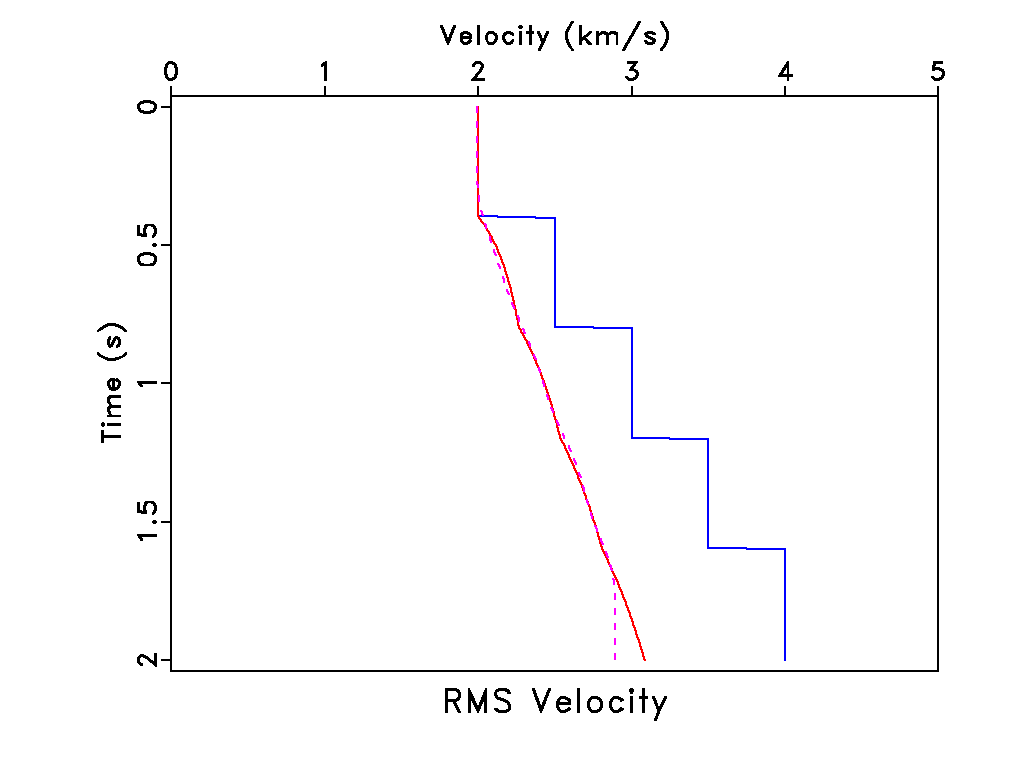

In [11]:
view('vrms')

In [12]:
%%file dix.scons

# Find position of reflectors
Flow('refs','nmo','stack | envelope | max1 | window n1=4 | real | pad beg1=1')

# Find RMS velocities for layers
Flow('vn','vrms refs','inttest1 coord=${SOURCES[1]} interp=spline nw=4')

Plot('picks','refs vn',
     '''
     cmplx ${SOURCES[1]} | 
     graph symbol=o symbolsz=8 wanttitle=n wantaxis=n plotcol=3
     transp=y yreverse=y min1=0 max1=2 min2=0 max2=5 pad=n
     ''')

# Find layer time thicknesses
Flow('dt','refs','igrad')

# Dix inversion
Flow('vdixn','vn refs dt',
     'mul ${SOURCES[:2]} | igrad | div ${SOURCES[2]} | math output="sqrt(input)" ')

Flow('vdix','vdixn refs',
     '''
     pad beg1=1 | igrad | window n1=4 | 
     bin1 head=${SOURCES[1]} x0=0 dx=0.004 nx=501 | causint
     ''')

Plot('vdix','vel vrms vdix',
     '''
     cat axis=2 ${SOURCES[1:3]} | 
     graph dash=0,0,1 title="Dix Inversion" label2=Velocity unit2=km/s
     transp=y yreverse=y wherexlabel=t wheretitle=b min2=0 max2=5 pad=n
     ''')

Result('vdix','vdix picks','Overlay')

Overwriting dix.scons


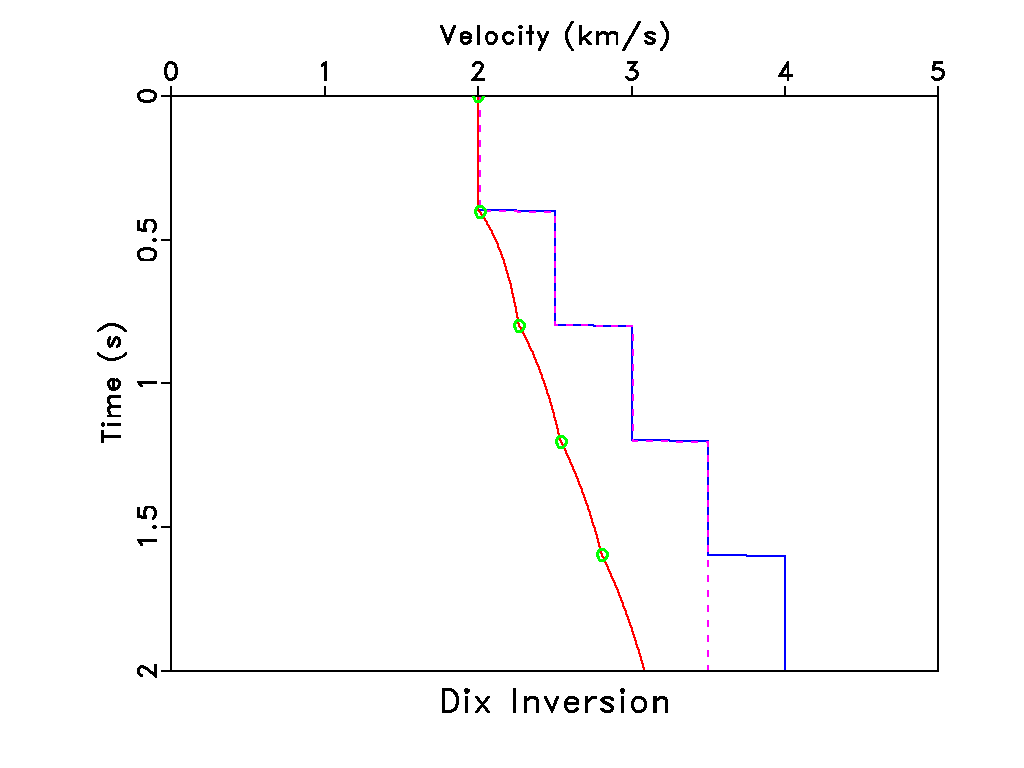

In [13]:
from m8r import view
view('vdix')

## Questions

1. Why is NMO gather muted? (*NMO stretch*)
2. What happened with other terms of the power expansion? (*Non-hyperbolic moveout*)
3. How is this related to time migration? (*RMS velocity versus time migration velocity*)
4. What happens in the case of lateral velocity variations?
5. What happens in the case of dipping reflectors? (*Dip moveout*)

# Multiple reflections

![](http://wiki.seg.org/images/8/8d/Ch06_fig0-18.png)

![](http://sepwww.stanford.edu/sep/prof/iei/mltp/Gif/nearoffset.gif)

> J. Claerbout, 1985, [Imaging the Earth's Interior](http://sepwww.stanford.edu/sep/prof/).

If $v_0(t_0)$ is the RMS velocity for the primary reflection, what is the corresponding velocity of the first pegleg multiple?

$$t_1 = \displaystyle t_0 + 2\,\frac{z_w}{v_w} = t_0 + t_w$$,

where $z_w$ is the water depth, $v_w$ is the water velocity, and $t_w$ is the water-bottom reflection traveltime.

$$v_1^2 = \displaystyle \frac{1}{t_1} \left(t_0\,v_0^2 + 2\,z_w\,v_w\right) = \frac{t_0\,v_0^2 + t_w\,v_w^2}{t_0+t_w} = v_0^2 - \frac{t_w}{t_1}\,\left(v_0^2-v_w^2\right)$$

In [17]:
%%file pegleg.scons

# Download pre-processed CMP gathers
# from the Viking Graben dataset
Fetch('paracdp.segy','viking')

# Convert to RSF
Flow('paracdp tparacdp','paracdp.segy',
     'segyread tfile=${TARGETS[1]}')

# Convert to CDP gathers, time-power gain and high-pass filter
Flow('cmps','paracdp',
     '''
     intbin xk=cdpt yk=cdp | window max1=4 | 
     pow pow1=2 | bandpass flo=5
     ''')

# Extract offsets
Flow('offsets','tparacdp',
     '''
     headermath output=offset | 
     intbin head=$SOURCE xk=cdpt yk=cdp | 
     dd type=float |
     scale dscale=0.001
     ''')


# Extract one CMP gather
########################

Flow('cmp1','cmps','window n3=1 f3=1000')
Flow('offset1','offsets','window n3=1 f3=1000 squeeze=n')

# Velocity scan

Flow('vscan1','cmp1 offset1',
     '''
     vscan semblance=y half=n v0=1.4 nv=121 dv=0.02 
     offset=${SOURCES[1]}
     ''')
Plot('vscan1',
     'grey color=j allpos=y title="Semblance Scan" unit2=km/s')

# Automatic pick

Flow('vpick1','vscan1','mutter inner=y v0=0.4 t0=0.7 x0=1.4 half=n | pick rect1=25 vel0=1.45')
Plot('vpick1',
     '''
     graph yreverse=y transp=y plotcol=7 plotfat=7 
     pad=n min2=1.4 max2=3.8 wantaxis=n wanttitle=n
     ''')

# Predict multiple velocity
vw=1.45  # water velocity
tw=0.48  # water depth
nw=121   # water depth in time samples
dt=0.004

Flow('water','vpick1','spike k1=%d | causint' % nw)
Flow('vmult1','vpick1 water',
     '''
     pad beg1=%d | window n1=1001 | put o1=0 |
     math output="input*input" | 
     math m=${SOURCES[1]} output="(1-m)*%g+m*sqrt((input*(x1-%g)+%g)/(x1+%g))" 
     ''' % (nw,vw,tw,vw*vw*tw,dt))
Plot('vmult1',
     '''
     graph yreverse=y transp=y plotcol=7 plotfat=7 dash=1
     pad=n min2=1.4 max2=3.8 wantaxis=n wanttitle=n
     ''')  

Result('vscan2','vscan1 vpick1 vmult1','Overlay')


Overwriting pegleg.scons


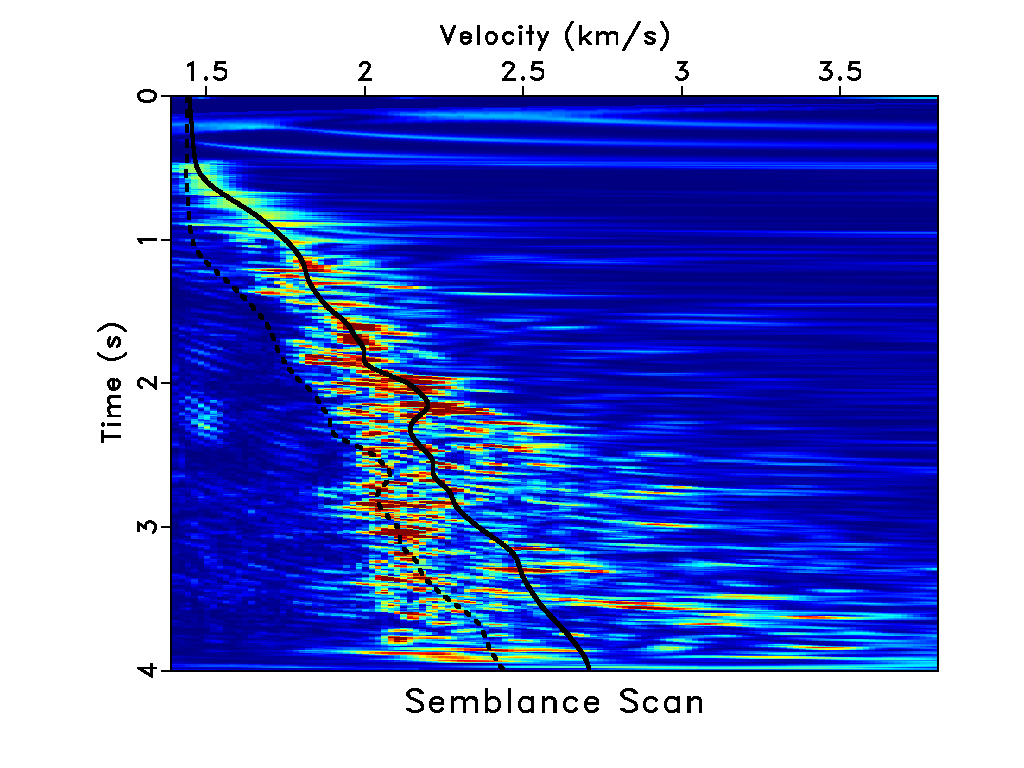

In [18]:
from m8r import view
view('vscan2')

In [21]:
%%file nmomult.scons

Flow('nmo1','cmp1 offset1 vpick1','nmo half=n offset=${SOURCES[1]} velocity=${SOURCES[2]}')
Flow('nmo2','cmp1 offset1 vmult1','nmo half=n offset=${SOURCES[1]} velocity=${SOURCES[2]}')

Plot('nmo1','window min1=2.5 | grey title="NMO with a higher velocity" ')
Plot('nmo2','window min1=2.5 | grey title="NMO with a lower velocity" ')

Result('nmo2','nmo1 nmo2','SideBySideAniso')

Overwriting nmomult.scons


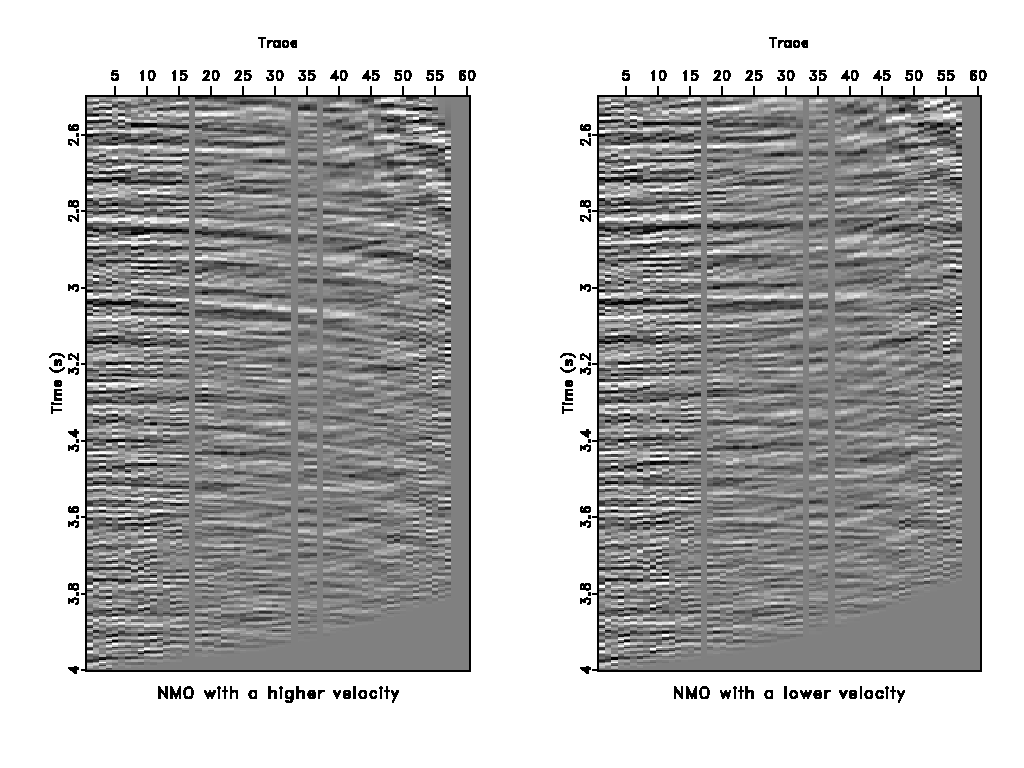

In [22]:
view('nmo2')